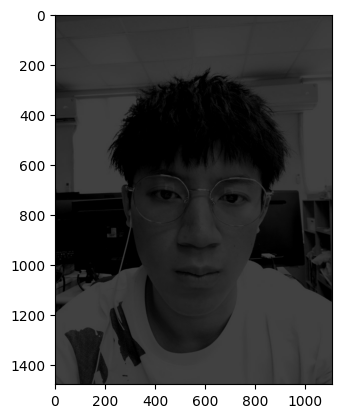

In [131]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 毒入圖片檔
input = cv2.imread('source/input.jpg',0)
plt.imshow(cv2.imread('source/input.jpg',1)) 


Maxiumn gray scalar:  69
p0,p1,...pk: {0,1,2...., 69 }
pk frequency:  [216328, 20849, 13650, 13076, 11315, 10261, 9887, 9571, 9312, 9313, 8845, 8586, 8594, 8952, 8700, 8757, 8540, 8779, 9321, 9443, 9627, 10296, 11045, 11437, 11770, 12140, 12946, 13243, 14451, 16012, 16275, 16943, 16784, 16512, 15001, 14242, 13553, 12354, 12094, 12593, 11792, 12165, 13870, 16506, 15973, 16930, 19136, 18751, 16378, 17863, 18436, 25745, 27471, 28265, 33943, 35179, 47631, 47657, 49356, 56042, 43079, 34740, 20458, 18120, 37205, 271292, 948, 154, 24, 10]


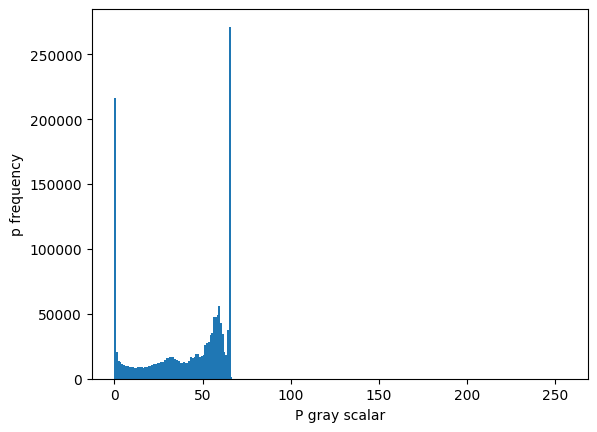

In [132]:
# 圖片長寬
height, width = input.shape[:2]

# 找出圖片最大灰階值、灰階值頻率
max_gray_scalar = 0   # 最大灰階值
frequency = [0]*70    # 灰階值頻率
for x in range(width):
    for y in range(height):
        if input[y,x]> max_gray_scalar:
            max_gray_scalar = input[y,x]
        frequency[input[y,x]] += 1

print('Maxiumn gray scalar: ',max_gray_scalar)
print('p0,p1,...pk: {0,1,2....,',max_gray_scalar,'}')
print('pk frequency: ',frequency)

# 顯示輸入圖片頻率
plt.hist(input.ravel(), 256, [0, 256])
plt.ylabel("p frequency") # y label
plt.xlabel("P gray scalar") # x label
plt.show()

q frequency:  [0, 36.956641426053885, 39.08356838552143, 41.12105533951394, 42.8841453429114, 44.483002304896495, 46.02358302638043, 47.514924999205626, 48.96590989638965, 50.41705061239853, 51.79526811836853, 53.13312854869735, 54.472235529625124, 55.867125649856156, 57.22274942622009, 58.58725487560158, 59.91794763998641, 61.285881103515024, 62.73826837012287, 64.20966553336477, 65.70973336038266, 67.31404398123819, 69.03506290192091, 70.81716280195243, 72.65115037066548, 74.54279090458022, 76.56002141133969, 78.6235301090854, 80.87526794727334, 83.37023897108246, 85.90619034583224, 88.54622869559478, 91.16149185220308, 93.73437228844692, 96.07181048031305, 98.2909821841033, 100.4027947175585, 102.3277804799953, 104.21225334796604, 106.17447980954661, 108.01189539240679, 109.90743139694325, 112.06863849788208, 114.64058402117669, 117.1294781108159, 119.76749081585514, 122.74923984855631, 125.67099863368277, 128.22299934739408, 131.0063910160365, 133.8790668713291, 137.89062251759225,

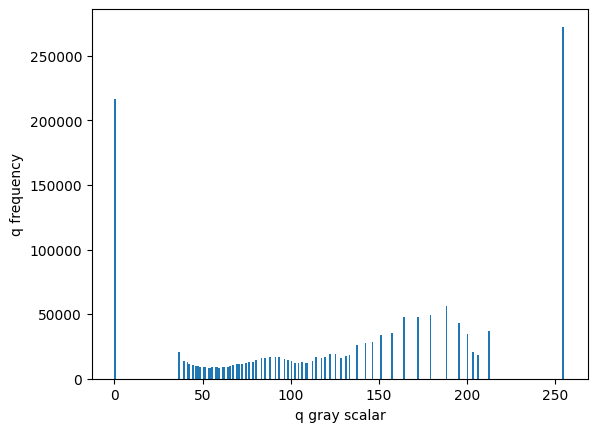

In [133]:
# gray scale 0~69 => 0~255  
# p0,p1,...pk = 0,1,2,...,69
# q0=0, qk=255 
output = input.copy() 

# 公式
m = (255 - 0)/ (width*height)
q = [0]*70
q[0] = 0
q[69] = 255
for i in range(1,69):
    q[i] = m * np.sum(frequency[0:i+1]) + 0
print('q frequency: ',q)


# 輸出圖片
for x in range(width):
    for y in range(height):
        output[y,x] = q[input[y,x]]

# 顯示輸出圖片頻率
plt.hist(output.ravel(), 256, [0, 256])
plt.ylabel("q frequency") # y label
plt.xlabel("q gray scalar") # x label
plt.show()

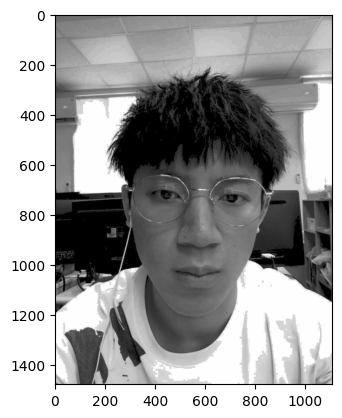

In [134]:
# 存入檔案
cv2.imwrite('source/output.jpg', output)
plt.imshow(cv2.imread('source/output.jpg',1)) 
